# Exercise 1

At the dentist's office, our inference problem consists in learning the posterior probability $P(r|D)$ in
\begin{equation}\label{posterior}
P(r|\{x_1,\ldots,x_n\})={P(\{x_1,\ldots,x_n\}|r)P(r)\over P(\{x_1,\ldots,x_n\})}  \ ,
\end{equation}
of the model parameter $r$ given the observations $D=\{x_1,\ldots,x_N\}$, where $r$ has a certain prior distribution $P(r)$. The likelihood is
\begin{equation}\label{likelihood}
P(\{x_1,\ldots,x_n\}|r)=\prod_{i=1}^NP(x_i|r)={r^Ne^{-r(x_1+\ldots+x_N)}\over Z(r)^N}  \ .
\end{equation}
where the observations are restricted to the interval $x_i\in[0,60]$ minutes, for $i=1,\ldots,N$. Let us fix a simple prior distribution, $P(r)=const$ over the positive real line. You have collected in total 5 observations: $D=\{10,15,50,3,12\}$.

**Question 1**: Plot the posterior distribution of $r$ as you increase the number of observations from one to five. What do you observe?

**Question 2**: Compare the posteriors in the previous case, with the posterior you obtain by using two different priors. First, the following truncated gaussian prior
\begin{equation}\label{gaussianprior}
P(r|\bar r,\sigma_r^2)=\left\{
\begin{array}{cc}
e^{-{(r-\bar r)^2\over 2\sigma_r^2}}/Z_{prior}(\bar r,\sigma_r^2) \ ,&\qquad r\geq0 \\
0 \ ,&\textrm{otherwise}
\end{array}
\right.
\end{equation}
with mean $\bar r^{-1}=10$ minutes and variance $\sigma_r^2=0.001$ minutes$^{-2}$ (crucial: you have to calculate the normalization factor $Z_{prior}(\bar r,\sigma_r^2)$). Second, an exponential prior $P(r)={\bar r}^{-1} e^{- r/\bar r}$ with $\bar r^{-1}=15$ minutes.

Explain in words the effect different priors exert on the posterior.

### Answer to Question 1

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math

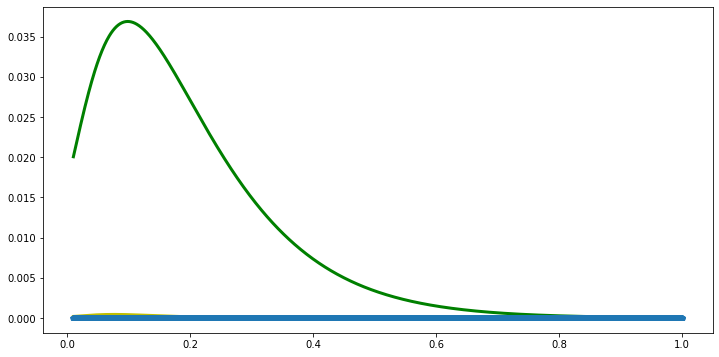

In [ ]:
# useful variables / lists
e=math.e
x1=[10]
x2=[10, 15]
x3=[10, 15, 50]
x4=[10, 15, 50, 3]
x5=[10, 15, 50, 3, 12]
r = np.linspace(0.01, 1, 1000)

# liklihood equation
def like(x,r):
    return ((((r**(len(x)))*e**(-r*sum(x)))/((1-e**(-60*r))**len(x))))

def post(x,r):
    return (like(x,r)*1/len(x))


#plot
plt.figure(figsize=(12,6))

plt.plot(r, post(x1,r), "g", linewidth = 3.0) #one observation
plt.plot(r, post(x2,r), "y", linewidth = 3.0) #two observations
plt.plot(r, post(x3,r), "b", linewidth = 3.0) #three observations
plt.plot(r, post(x4,r), "r", linewidth = 3.0) #four observations
plt.plot(r, post(x5,r), "p", linewidth = 3.0) #five observations

### Answer to Question 2

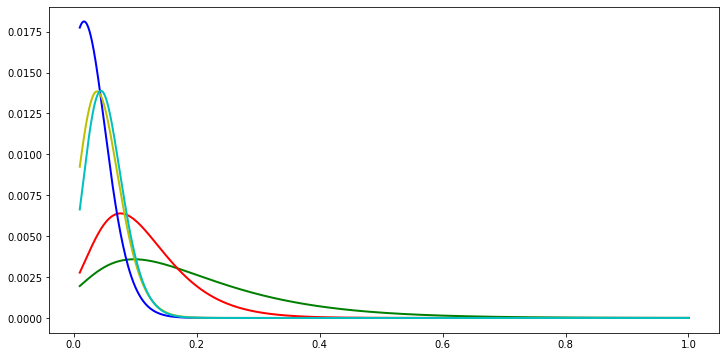

In [ ]:
# Question 2
def gaussian_prior(r):
    if np.any(r<0):
        return (0)
    else:
        return ((e**((r-1/10)**2)/2*0.001))

def gauss_prior_norm(r):
    un_norm = gaussian_prior(np.linspace(0.01,1,1000))/1000
    return (gaussian_prior(r)/np.sum([un_norm]))

def pprob_gau(x,r): #probability of posterior
    to_normalize = (like(x,r))*(gauss_prior_norm(r))
    norm_factor = np.sum (like(x,(np.linspace(0.01,1,1000))))*(gauss_prior_norm(np.linspace(0.01,1,1000)))
    return (to_normalize/norm_factor)

plt.figure(figsize=(12, 6))

r = np.linspace(0.01,1,1000)

plt.plot(r, pprob_gau(x1,r), "g", linewidth=2.0) #one
plt.plot(r, pprob_gau(x2,r), "r", linewidth=2.0) #two
plt.plot(r, pprob_gau(x3,r), "b", linewidth=2.0) #three
plt.plot(r, pprob_gau(x4,r), "y", linewidth=2.0) #four
plt.plot(r, pprob_gau(x5,r), "c", linewidth=2.0) #five


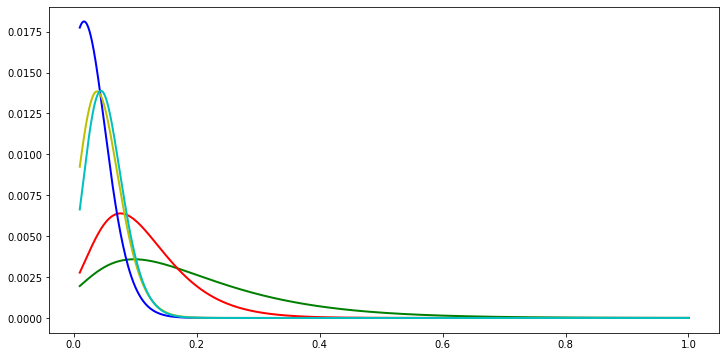

In [ ]:
def expo_prior(r):
    return (15*e**(-r*(r)**(0.5)))

def expo_prior_norm(r):
    un_norm = expo_prior(np.linspace(0.01,1,1000))/1000
    return (expo_prior(r)/np.sum([un_norm]))

def pprob_expo(x,r):
    to_normalize = (like(x,r))*(expo_prior_norm(r))
    norm_factor = np.sum(like(x, (np.linspace(0.01,1,1000))))*(expo_prior_norm(np.linspace(0.01,1,1000)))
    return (to_normalize/norm_factor)

plt.figure(figsize = (12,6))

r = np.linspace(0.01,1,1000)

plt.plot(r, pprob_expo(x1,r), "g", linewidth=2.0) #one
plt.plot(r, pprob_expo(x2,r), "r", linewidth=2.0) #two
plt.plot(r, pprob_expo(x3,r), "b", linewidth=2.0) #three
plt.plot(r, pprob_expo(x4,r), "y", linewidth=2.0) #four
plt.plot(r, pprob_expo(x5,r), "c", linewidth=2.0) #five

The posterior that we calculated in part 1 looks a lot different than those calculated in part 2 of the question. The two priors that we used in part 2 came out to look pretty similiar.

# Exercise 2

Prove the following statement: Given a random variable $X$ (which comes with its outcome $x$, its possible values $A_X=(a_1,\ldots,a_N)$ and its probability distribution $P_X=(p_1\ldots,p_N)$, prove that the uniform distribution $p_i=1/N$ is the one with the maximum entropy. Hint: This is a constrained maximization problem, where you extremize the entropy $H(X)$ subject to the constraint $\sum_i p_i=1$. You may use a Lagrange multiplier $\lambda$ and maximize the following functional:
$$
G(p_i,\lambda)=H(X)+\lambda\left(\sum_{i=1}^N p_i-1\right)
$$

### Answer:
To find our maximum entropy. We have to maximize the following equation:
$$
G(p_i,\lambda)=H(X)+\lambda\left(\sum_{i=1}^N p_i-1\right)
$$
where,
$$
H(X)= -\sum_{i=1}^N p_i ln(p_i)
$$
We will maximize the equation by first taking the partial with respect to $p_i$ and then set it equal to 0. Hence,

$
\begin{align}
{\partial G\over \partial p_i} &= -ln(p_i)-1+\lambda \\
0 &= -ln(p_i)-1+\lambda \\
ln(p_i)&=\lambda-1 \\
p_i &= e^{\lambda-1}
\end{align}
$

Next, we will do the same but now with respect to $\lambda$.

$
\begin{align}
{\partial G\over \partial \lambda} &= \sum_{i=1}^N p_i-1\\
0 &= \sum_{i=1}^N p_i-1 \\
1 &= \sum_{i=1}^N p_i
\end{align}
$

So from taking the partials we have obtained two important relationships:
$$
p_i = e^{\lambda-1} \text{   and   } 1 = \sum_{i=1}^N p_i
$$

Now, we can plug in our $p_i$ value into our summation equation (note: $e^{1+\lambda}$ does not depend on $i$).
$
\begin{align}
1 &= \sum_{i=1}^N e^{\lambda-1} \\
1 &= e^{1-\lambda}+ e^{\lambda-1}+e^{\lambda-1}+e^{\lambda-1}....e^{\lambda-1} \\
1 &= N(e^{\lambda-1}) \\
\frac{1}{N} &= e^{\lambda-1} \\
\frac{1}{N} &= p_i
\end{align}
$

Therefore, we found by maximizing $ G(p_i,\lambda) $ that the $p_i$ that maximizes entropy is $\frac{1}{N}$ as desired.